# Convolutional Neural Network Architectures

# Timeline
&nbsp;

<li> 1943: First mathematical model of a neural network. </li>
<li> 1957: Perceptron model. </li>
<li> 1969: First AI Winter - Perceptron model was incapable of learning the simple XOR function. </li>
<li> 1986: Backpropagation allowed training of deep networks.  </li>
<li> 1989: Universal approximation theorem. </li>


**Problems:**

<li> Feedforward networks provide a universal system for representing functions. However, there is no universal procedure for examining a training set of specific examples and choosing a function that will generalize to points not in the training set. </li>
<li> Even though neural networks with a single hidden layer are universal approximators for "any" function, these networks tend to overfit. </li>
<li> The universal approximation theorem doesn't state any bounds on the width of the hidden layer. </li>


# Timeline (continued)
&nbsp;

<li> 1995: Second AI Winter - Learning didn't scale for larger problems and SVMs became the method of choice. </li>
<li> 1998: <b>LeNet5</b> (5 layers) introduced gradient based learning. </li>

The spatial size of the output $\large (O)$ is computed using the following expression:

$$ \large O = \frac{I - F + P}{S} + 1 $$

where $\large I $ is the spatial size of the input, $\large F$ is the receptive field (filter) size of the convolution, $\large S$ is the stride of the convolution, and $\large P$ is the (zero) padding. 

![python-scistack](https://d2l.ai/_images/lenet.svg)


<li> 2010: Imagenet dataset was created and the annual Imagenet competition kicked off. </li>
<li> 2010: <b>Dropout</b>. </li>

Dropout is used to reduce overfitting in a network, i.e., generalization of the trained models. It effectively allows for training an ensemble of neural networks by randomly "dropping out" (i.e. omitting) a percentage $\large p$ of the nodes in the network during training. This reduces the network's reliance on any particular small subset of nodes.

Standard neural network: ($\large l$ denotes hidden layer and $\large i$ denotes hidden unit)

\begin{eqnarray}
\large z_i^{(l+1)} &=&  \large \mathbf{w}_i^{(l+1)} \mathbf{x}^{(l)} + b_1^{(l+1)} \\
\large x_i^{(l+1)} &=& \large f( z_i^{(l+1)})
\end{eqnarray}

Neural network with dropout:

\begin{eqnarray}
\large  r_{j}^{(l)} &\sim&  \large \text{Bernoulli}(p) \\
\large \tilde{x}^{(l)}_j &=& \large r^{(l)}_j x^{(l)}_j \\
\large z_i^{(l+1)} &=&  \large \mathbf{w}_i^{(l+1)} \mathbf{\tilde{x}}^{(l)} + b_1^{(l+1)} \\
\large x_i^{(l+1)} &=& \large f( z_i^{(l+1)})
\end{eqnarray}

<img src="http://lamda.nju.edu.cn/weixs/project/CNNTricks/imgs/dropout.png" alt="Drawing" style="width: 1000px;"/>

During inference (testing), a simple averaging of the nodes' contribution is used to represent the ensemble of models, i.e., all nodes in the network are turned on and the weights are adjusted with probability $\large p$.

&nbsp;

<li> 2012: <b>AlexNet</b> (9 layers, 2012 Imagenet competition winner) halved existing Imagenet competition error. </li>

Ensemble approaches have been very common entries to the Imagenet competition. 

![python-scistack](https://cdn-images-1.medium.com/max/1200/1*wzflNwJw9QkjWWvTosXhNw.png)

&nbsp;



<li> September 4th, 2014: <b>VGG</b> (19 layers). </li>

![python-scistack](https://www.researchgate.net/profile/Clifford_Yang/publication/325137356/figure/fig2/AS:670371271413777@1536840374533/llustration-of-the-network-architecture-of-VGG-19-model-conv-means-convolution-FC-means.jpg)

&nbsp;
&nbsp;





# VGG Implementation

In [1]:
from keras.layers import Input, Dense, Activation, Flatten, Conv2D, AveragePooling2D, MaxPool2D, Dropout
from keras.optimizers import SGD
from keras.models import Model
import keras


Using TensorFlow backend.


In [16]:
I = Input(shape=(224, 224, 3))

x = Conv2D(64, kernel_size=3, padding="same")(I)
x = Activation("relu")(x)
x = Conv2D(64, kernel_size=3, padding="same")(x)
x = Activation("relu")(x)
x = MaxPool2D()(x)
x = Dropout(0.25)(x)

x = Conv2D(128, kernel_size=3, padding="same")(x)
x = Activation("relu")(x)
x = Conv2D(128, kernel_size=3, padding="same")(x)
x = Activation("relu")(x)
x = MaxPool2D()(x)
x = Dropout(0.25)(x)

x = Conv2D(256, kernel_size=3, padding="same")(x)
x = Activation("relu")(x)
x = Conv2D(256, kernel_size=3, padding="same")(x)
x = Activation("relu")(x)
x = Conv2D(256, kernel_size=3, padding="same")(x)
x = Activation("relu")(x)
x = Conv2D(256, kernel_size=3, padding="same")(x)
x = Activation("relu")(x)
x = MaxPool2D()(x)
x = Dropout(0.25)(x)

x = Conv2D(512, kernel_size=3, padding="same")(x)
x = Activation("relu")(x)
x = Conv2D(512, kernel_size=3, padding="same")(x)
x = Activation("relu")(x)
x = Conv2D(512, kernel_size=3, padding="same")(x)
x = Activation("relu")(x)
x = Conv2D(512, kernel_size=3, padding="same")(x)
x = Activation("relu")(x)
x = MaxPool2D()(x)
x = Dropout(0.25)(x)

x = Conv2D(512, kernel_size=3, padding="same")(x)
x = Activation("relu")(x)
x = Conv2D(512, kernel_size=3, padding="same")(x)
x = Activation("relu")(x)
x = Conv2D(512, kernel_size=3, padding="same")(x)
x = Activation("relu")(x)
x = Conv2D(512, kernel_size=3, padding="same")(x)
x = Activation("relu")(x)
x = MaxPool2D()(x)
x = Dropout(0.25)(x)

x = Flatten()(x)

x = Dense(4096)(x)
x = Activation("relu")(x)
x = Dropout(0.25)(x)
x = Dense(4096)(x)
x = Activation("relu")(x)
x = Dropout(0.25)(x)

x = Dense(1000)(x)
x = Activation("softmax")(x)

model = Model(inputs=I, outputs=x)

model.compile(loss="categorical_crossentropy", optimizer=SGD(0.01), metrics=["accuracy"])

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
activation_51 (Activation)   (None, 224, 224, 64)      0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
activation_52 (Activation)   (None, 224, 224, 64)      0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 112, 112, 64)      0         
__________

# Timeline (continued)

&nbsp;


<li> March 4th, 2014: <b>Network-in-Network</b>. </li>

The purpose of the Network-in-Network architecture is to replace the **linear** convolutional layers by **multi-layer perceptron (mlp)** layers to create non-linear representations of the inputs. Each fully-connected layer inside the mlp layer is equivalent to a $\large 1\times1$ convolution.

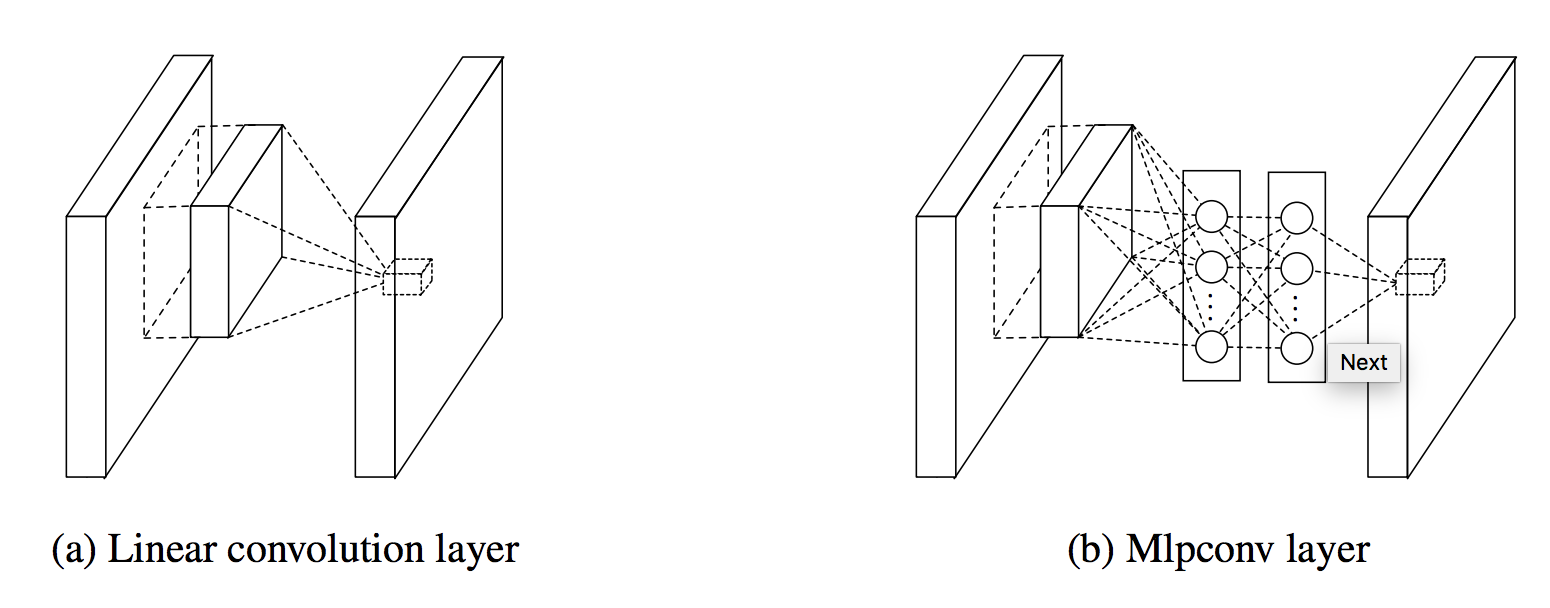

**Bottleneck layer:** Also known as Network-in-Network or $\large 1\times 1$ convolution. While regular convolutions are great at altering the spatial space, bottleneck layers are mostly used to modify the number of filters / channels. These $\large 1\times1$ convolutions are very important to speed up inference of the models (**satellites**).

&nbsp;

<li> September 10th, 2014: <b>GoogleNet - Inception v1</b> (22 layers, 2014 Imagenet competition winner). </li>

**Inception Module:** It's a block of convolutions in parallel that serves two purposes: 1) Extracts features of different sizes; and 2) Reduces number of parameters.

![python-scistack](https://cdn-images-1.medium.com/max/1600/0*CJZdXZULMr_on1Ao.jpg)

**Benefit of bottleneck layers:** To apply a $\large 3\times3$ convolution from $\large 256$ inputs to  $\large 256$ outputs, we need $\large 3\times3\times256\times256 = 589000$ parameters. 

If instead, we use $\large 1\times1$ convolutions to reduce the channel space, we get

\begin{eqnarray}
\large 256 \times 64 \times 1 \times 1 = 16384\\
\large 64 \times 64 \times 3 \times 3 = 36864 \\
\large 64 \times 256 \times 1 \times 1 = 16384 
\end{eqnarray}

This sums up to $\large 69632$ parameters which is one order of magnitude smaller than applying the $\large 3\times3$ convolution directly.

**Early exits:** Used to speed up inference pass.


![python-scistack](https://cdn-images-1.medium.com/max/1600/1*uW81y16b-ptBDV8SIT1beQ.png)

Inception has significantly fewer parameters than VGG and Network-in-Network while retaining similar accurary. 

&nbsp;

<li> February 11th, 2015: <b>Inception v2 (batch normalization)</b>. </li>

**Batch Normalization:** Recall our simple neural network (from Introduction to NNs):

![python-scistack](https://cdn-images-1.medium.com/max/1600/1*jDPidgu4d5zF6EkYvKo04w.png)


\begin{eqnarray}
\large Z_1 &=&  \large W_1 X + b_1 1_m \\
\\
\large X_1 &=& \large \text{tanh}(Z_1) \ (\text{pw}) \\
\\
\large \tilde X_1 &=& \large \text{BN}(X_1) \\
\\
\large Z_2 &=&  \large W_2 \tilde X_1 + b_2 1_m \\
\\
\large X_2 &=& \large \sigma(Z_2) \ (\text{pw})
\end{eqnarray}

Batch normalization speeds up training by normalizing (to a standard Gaussian) the hidden layer inputs. The speed-up arises from the network not having to learn the offsets across features in the input data. The paper outlines the backpropagation routine including the batch normalization transformation.

&nbsp;

<li> December 2nd, 2015: <b>Inception v3</b> (48 layers). </li>

Expand receptive field, while reducing number of parameters, by using stack of $\large 3\times3$ convolutions:
<img src="https://cdn-images-1.medium.com/max/1600/0*Y9mKbwp1R8vAmT2L.jpg" alt="Drawing" style="width: 500px;"/>

Reduce number of paprameters by using **asymmetric convolutions**:
<img src="https://cdn-images-1.medium.com/max/1600/0*rRv_N9rLYJnmq6jz.jpg" alt="Drawing" style="width: 500px;"/>




# Inception Module Implementation

In [20]:
I = Input(shape = (32, 32, 3))

# Inception Module
tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(I)
tower_1 = Conv2D(64, (3,3), padding='same', activation='relu')(tower_1)

tower_2 = Conv2D(64, (1,1), padding='same', activation='relu')(I)
tower_2 = Conv2D(64, (5,5), padding='same', activation='relu')(tower_2)

tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(I)
tower_3 = Conv2D(64, (1,1), padding='same', activation='relu')(tower_3)

# Concatenation Step
output = keras.layers.concatenate([tower_1, tower_2, tower_3], axis = 3)
output = Flatten()(output)
out    = Dense(10, activation='softmax')(output)

model = Model(inputs = input_img, outputs = out)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_63 (Conv2D)              (None, 32, 32, 64)   256         input_8[0][0]                    
__________________________________________________________________________________________________
conv2d_65 (Conv2D)              (None, 32, 32, 64)   256         input_8[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_21 (MaxPooling2D) (None, 32, 32, 3)    0           input_8[0][0]                    
__________________________________________________________________________________________________
conv2d_64 

# Vanishing/Exploding Gradients

Researchers had observed that neural networks presented worse performance with increasing depth

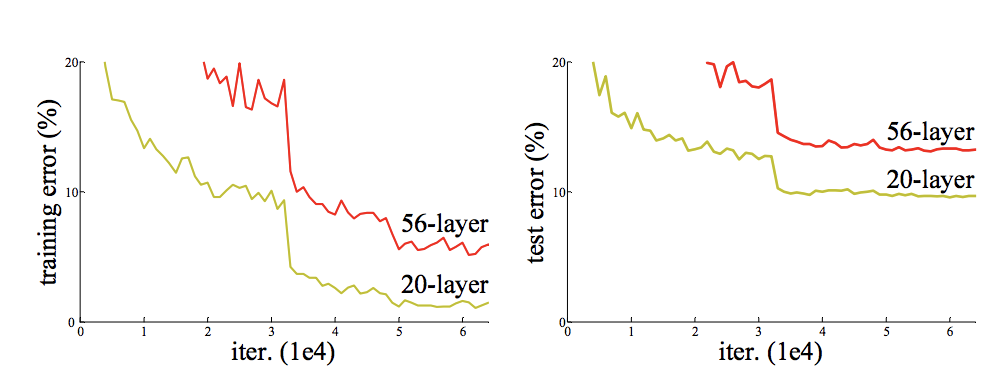

The degradation in performance had to be an artifact (**vanishing gradients**) of training since shallow networks can be made deeper by stacking layers using identity mappings. 

Recall that "vanilla" neural networks take the form

$$ \large x_{t+1} = F(x_t, \theta_t) $$

where $\large F$ is the composition of functions (convolutions, activations, dropout, batch normalization, etc). For a neural network with $\large N$ layers, backpropagation to the $\large j$ hidden layer takes the form


\begin{eqnarray}
\large \nabla_{\theta_j} F(x_N, \theta_N) &=& \large \nabla_{x_N} F(x_N, \theta_N) \nabla_{\theta_j} x_N \\
&=& \large \nabla_{x_N} F(x_N, \theta_N) \nabla_{\theta_j} F(x_{N-1}, \theta_{N-1})  \\
&=& \large  \nabla_{x_N} F(x_N, \theta_N) \nabla_{x_{N-1}} F(x_{N-1}, \theta_{N-1}) \nabla_{\theta_j} x_{N-1} \\ 
&=& \large  \nabla_{x_N} F(x_N, \theta_N) \nabla_{x_{N-1}} F(x_{N-1}, \theta_{N-1}) \nabla_{\theta_j} F(x_{N-2}, \theta_{N-1}) \\
&=& \large ... \\
&=& \large \prod_{i=j}^N \nabla_{x_i} F(x_i, \theta_i) 
\end{eqnarray}

If the gradients are smaller than $\large 1$, then the above product tends to $\large 0$ as the number of layers $\large N$ increases. This is denoted by vanishing gradient. On the other hand, if the gradients are bigger than $\large 1$, then the product tents to $\large \infty$ as the number of layers $\large N$ increases. This artifact is denoted by exploding gradient.


# Timeline (continued)
&nbsp;

<li> December 10th, 2015: <b>ResNet</b> (152 layers, 2015 Imagenet competition winner). </li>


The training bottleneck was resolved by the introduction of the ResNet block:

<img src="https://neurohive.io/wp-content/uploads/2019/01/resnet-570x328.png" alt="Drawing" style="width: 400px;"/>

This block can be written mathematically by

$$ \large x_{t+1} = x_t + F(x_t, \theta_t) $$

where $\large F$ is the composition of 6 consecutive operations. A ResNet architecture is a sequence of $\large N$ residual blocks and can be compactly expressed as

$$ \large x_{N} = x_0 + \sum_{i=0}^N F(x_i, \theta_i) $$

Now we show how ResNets deal with vanishing gradients. To show this, first we write $\large x_N$ in terms of the $\large j$th hidden layer, i.e.,

$$ \large x_N = x_j + \sum_{i=j}^N F(x_i, \theta_i) $$

Then backpropagation to the $\large j$ hidden layer takes the form

$$\large  \nabla_{\theta_j} x_N =   \nabla_{\theta_j} x_j + \nabla_{\theta_j} \left [ \sum_{i=j}^N  F(x_i, \theta_i)  \right ]$$

The skip layers in the ResNet architecture allow us to train deeper models (**satellites**).


**Remark:** The problem with exploding gradients is not resolved by ResNets.


# Timeline (continued)
&nbsp;
<li> February 23th, 2016: Inception v4 (Inception-ResNet). </li>
&nbsp;
&nbsp;


<img src="https://raw.githubusercontent.com/aleju/papers/master/neural-nets/images/Inception_v4__module_a.png
" alt="Drawing" style="width: 400px;height: 300px"/>

&nbsp;
&nbsp;


<li> March 16th, 2016: Improved ResNet block (1001 layers). </li>

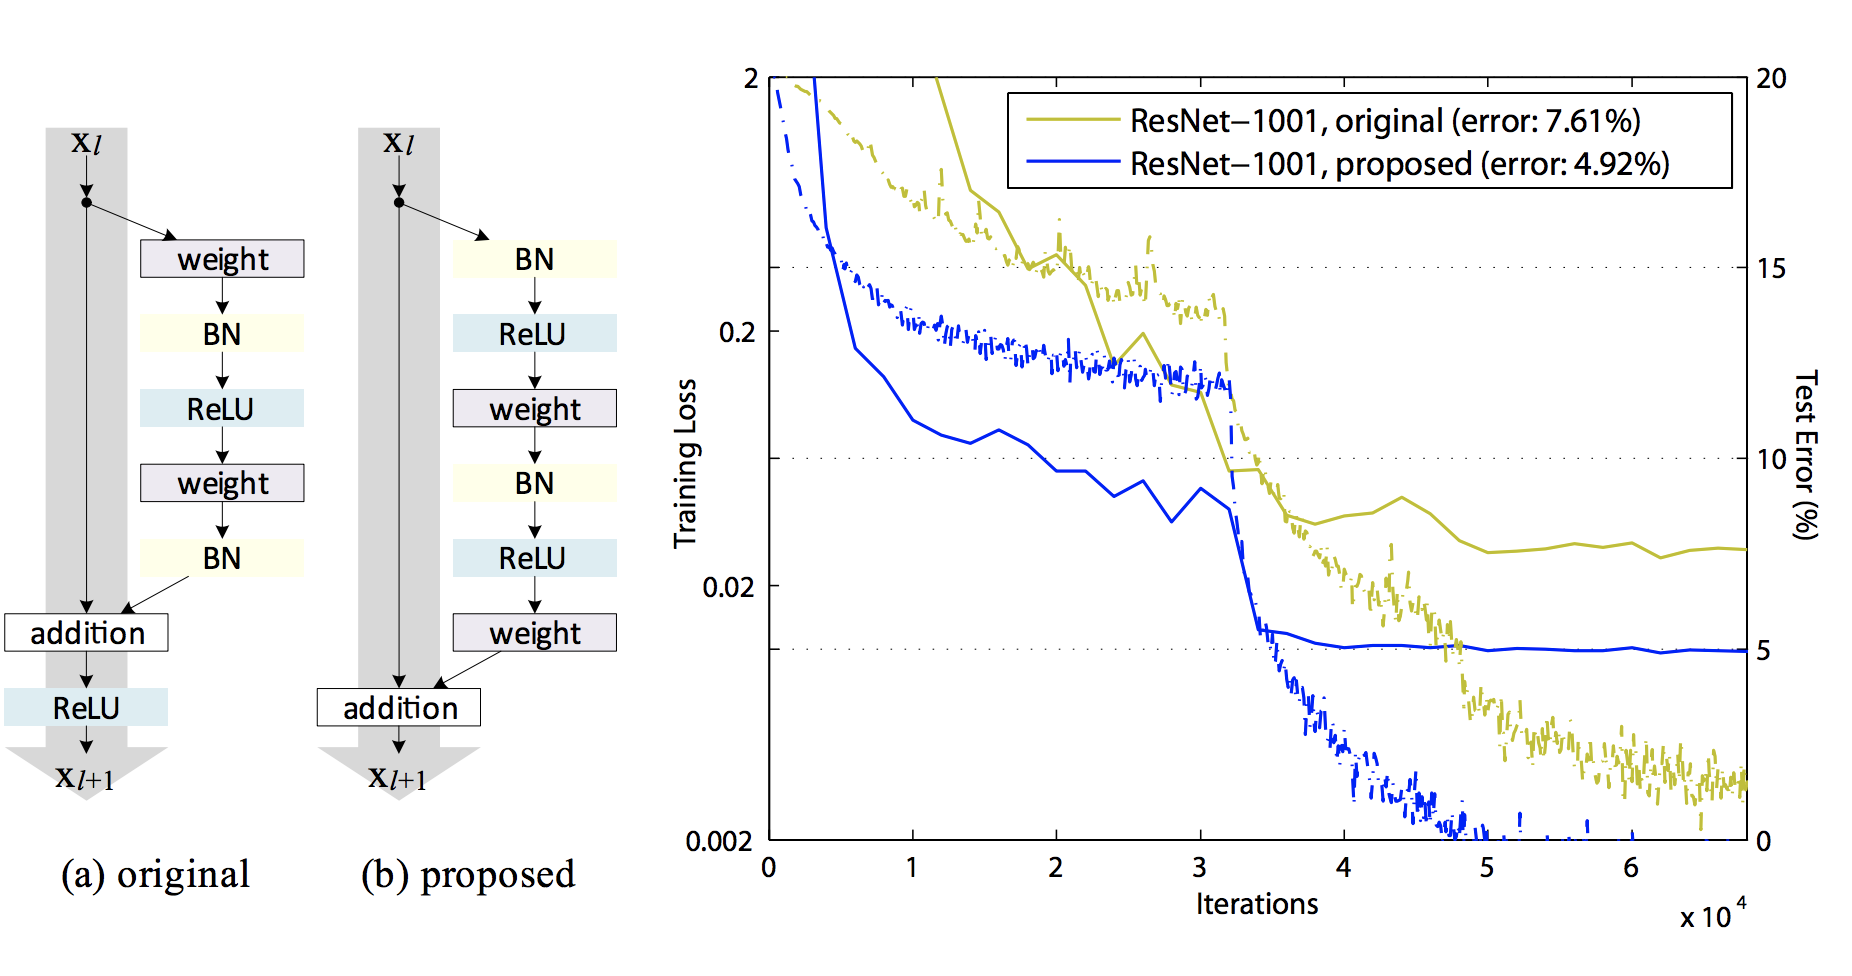

<li> August 26th, 2016: Densely connected convolutional networks (<b>DenseNets</b>). </li>


The DenseNet block can be written mathematically by

$$ \large x_{t+1} = F([x_0, x_1, ..., x_{t-1}]) $$

where $\large [\cdot] $ denotes concatenation and $\large F$ is the composition of three consecutive operations: batch normalization, rectified linear unit, and 3x3 convolution. Concatenation, instead of addition, was used to encourage feature reuse. 

Bottleneck layers (1x1 convolutions) were needed to reduce the number of layers passed through the DenseNet blocks.

<img src="https://cdn-images-1.medium.com/max/1600/1*gdFcbkMGn8aT8_iP1OpfmA.png" alt="Drawing" style="width: 900px;height:200px"/>

&nbsp;


# ResNet Ensemble Behavior: 


We are now able to train deep neural networks, but how can we improve their training speed?

**Stochastic Depth (2016):**


Stochastic depth is the generalization of dropout for layers/blocks, i.e., drops blocks randomly while training and uses full network while testing. We apply it to the ResNet block, i.e.,

$$ \large x_{t+1} = p_t F(x_t) + x_t $$

where $\large p_t$ is the survival probability (from a Bernoulli random variable) and takes the decaying form 

$$ \large p_t = 1 - \frac{t}{N} (1 - p_N) $$

where $\large N$ is the total number of ResNet blocks and $\large p_N = 0.5$ is the survival probability of the last residual block. Note that the input layer is never dropped.


<img src="https://cdn-images-1.medium.com/max/1600/1*TrqRTOVHgkJEZerirSVaEQ.png" alt="Drawing" style="width: 500px;height:400px"/>

**Remark:** Training speed for ResNets reduced drastically using stochastic depth. However, its performance increased which meant that many of the ResNet blocks were redundant.


Moreover, it was observed that training the ResNet without stochastic depth and then dropping blocks while testing didn't degrade performance of the network. The same experiment degraded performance of other neural networks such as VGG. 


By unrolling the ResNet blocks, we can deduce that there are $\large 2^N$ paths connecting inputs to output layers (where $\large N$ is the number of ResNet blocks).

<img src="https://cdn-images-1.medium.com/max/1600/1*u0YysXthezw5hW8WFwHjeQ.png" alt="Drawing" style="width: 800px;height:300px"/>


Thus deleting a ResNet block is equivalent to removing half of the total number of paths connecting inputs to outputs. On the other hand, removing a layer in "vanilla" neural networks destroys the only viable path from inputs to outputs.

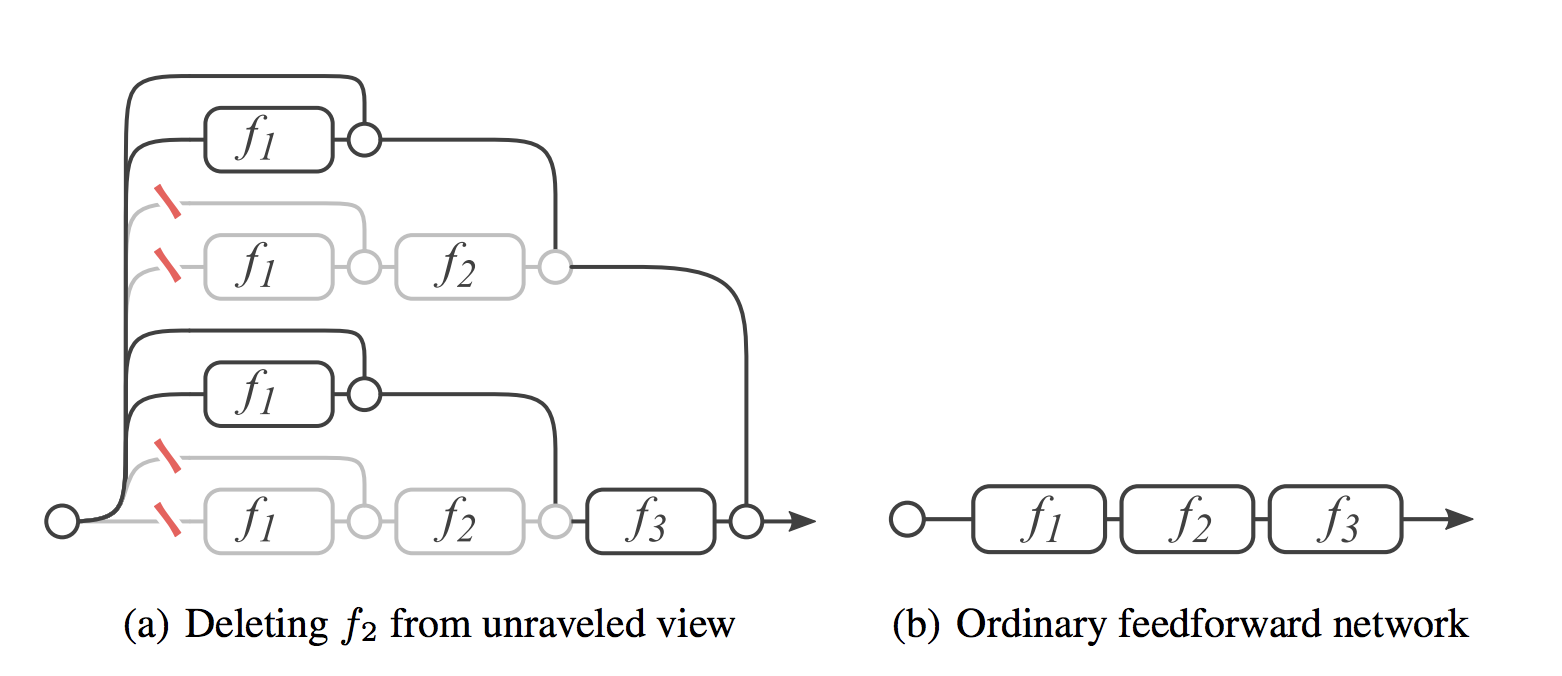

Deleting a single ResNet block compared to deleting a single VGG layer:

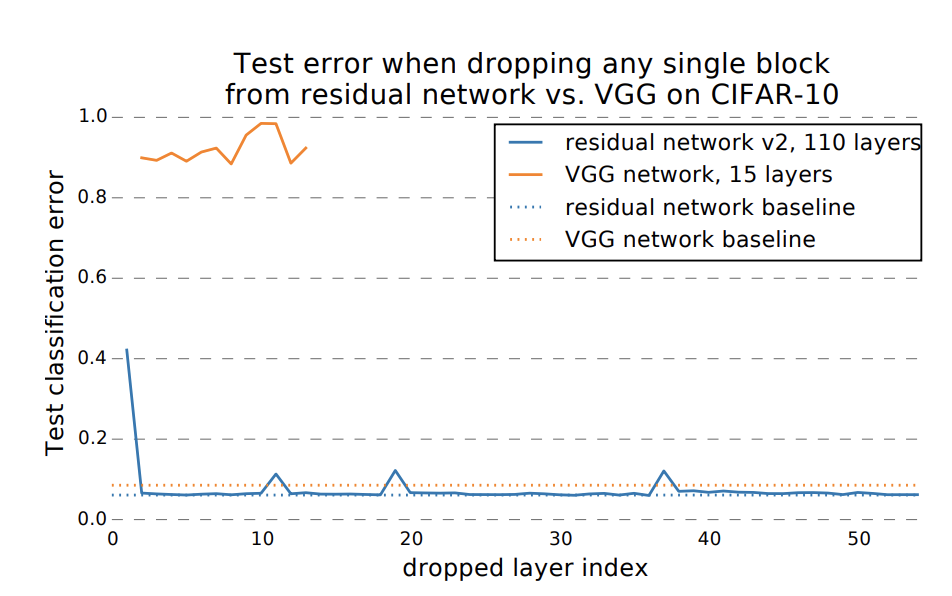

Deleting and reordering multiple ResNet blocks: The Kendall-Tau rank correlation is defined by 

$$ \frac{\# (ordered \ pairs) - \# (disordered \ pairs) }{\# (all pairs)} $$


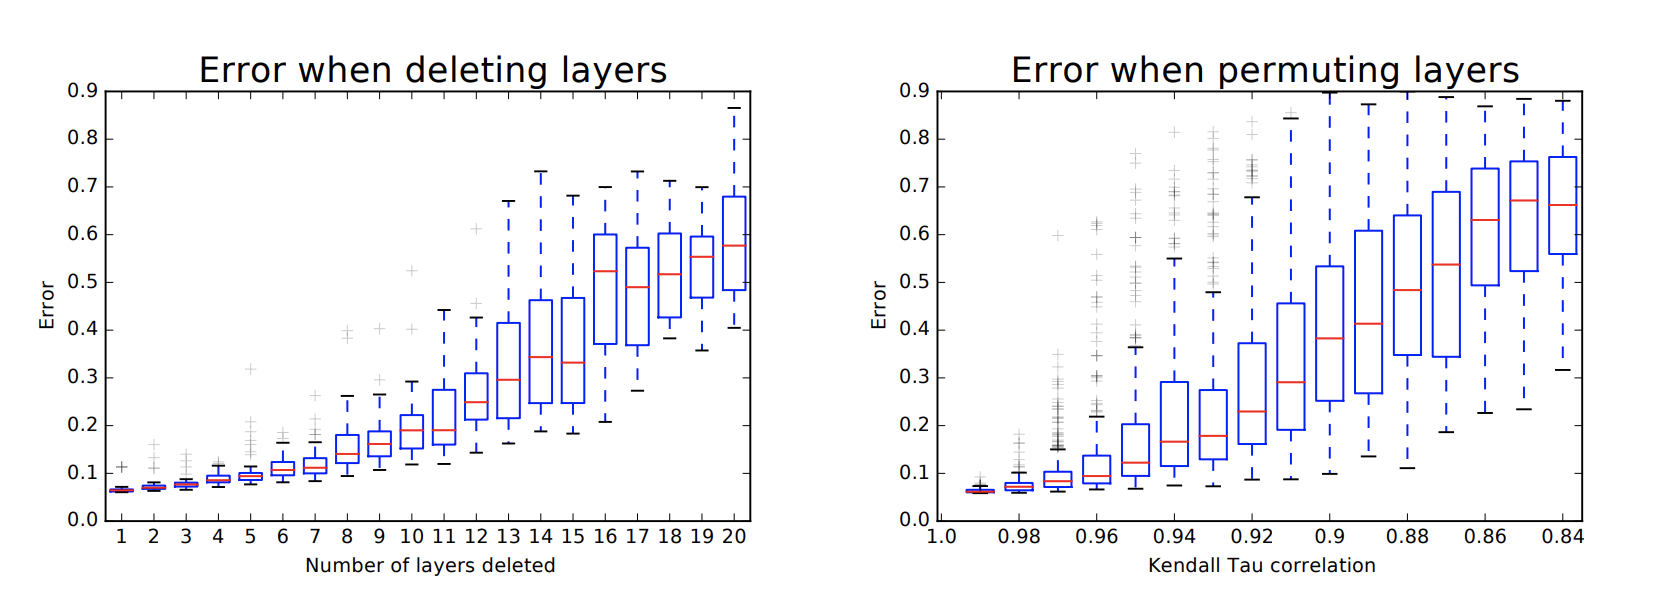


All paths in the ResNet have different lenghts (there is one path that goes through all blocks and there are $\large N$ paths that only go through on block). The distribution of path lengths is given by a Binomial distribution. The expected gradient contribution per path length is also computed. Finally, the total gradient magnitude is the multiplication of the these two quantities. 


<img src="https://cdn-images-1.medium.com/max/1600/1*kH6snoeFlQli10EsPYD7JQ.png" alt="Drawing" style="width: 900px;height:300px"/>

A new ResNet was trained only using effective paths through the network. Its error rate $\large 5.96\%$ was lower than the original ResNet $\large 6.10\%$.



# ResNet Stability

Recall that the ResNet architecture with $\large N$ blocks can be written recursively

$$ \large x_{i+1} = x_i + h F(x_i, \theta_i), \ \forall i \leq N $$

We can understand this recursive relation as a discretization (with step size defined based on $\large N$) of the following differential equation 

$$ \large \frac{d}{dt} x(t) = F(x(t), \theta(t)) = w^T (t) x(t) + b(t) $$

Under what conditions are these ODEs stable? How to learn $\large w(t)$ and $\large b(t)$? 

# CNN Architecture Comparison

<img src="https://cdn-images-1.medium.com/max/1600/1*n16lj3lSkz2miMc_5cvkrA.jpeg" alt="Drawing" style="width: 600px;"/>



## Next Time: U-Net Architecture